In [246]:
import matplotlib.pyplot as plt
import numpy as np


In [247]:
#Create the matrix as defined by Uehara:

def chi(a,q,kappa,s,mu = 0):
    #
    # PARAMETERS
    # a - a value for the trap
    # q - q value for the trap
    # kappa - friction term, see Hasegawa & Uehara for further details
    # s - integer number for which chi is defined
    # mu - complex number
    #
    #
    # RETURN
    # chi - chi_s(a,q,kappa)  as defined by Hasegawa & Uehara
    return q/((2*s-1j*mu)**2 -a + kappa**2)
    #return s


def makeMatrix(a,q,kappa,S_max, mu= 0):
    #
    # PARAMETERS
    # a - a value for trapping
    # q - q value for trapping
    # kappa - friction term, see Hasegawa & Uehara for further details
    # S_max - max value for which to compute chi_s matrix
    # 
    # RETURN
    # tridiagonal matrix as defined by Hasegawa & Uehara of dimension 2*S_max + 1
    matrix = np.identity(2*S_max+1,dtype = np.complex128)
    length = matrix.shape[0]
    matrix[0,1] = chi(a,q,kappa,-S_max)
    matrix[length-1,length-2] = chi(a,q,kappa,S_max)
    for j in range(1,length-1):
        s = j-S_max
        matrix[j,j+1] = chi(a,q,kappa,s,mu)
        matrix[j,j-1] = chi(a,q,kappa,-s,mu)
    return matrix

def detMu(a,q,kappa,tol = 1e-3,mu = 0):
    #Approximate Delta(mu) as defined by Hasegawa & Uehara
    #
    # PARAMETERS
    # a - a value for trapping
    # q - q value for trapping
    # kappa - friction term, see Hasegawa & Uehara for further details
    # tol - relative tolerance at which to stop calculating
    
    
    currentS = 1
    nextS = 2
    currentMatrix = makeMatrix(a,q,kappa,currentS)
    nextMatrix = makeMatrix(a,q,kappa,nextS)
    rel_diff = (np.linalg.det(currentMatrix)-np.linalg.det(nextMatrix))/np.linalg.det(currentMatrix)
    while np.abs(rel_diff) > tol:
        nextS +=1
        currentS +=1
        currentMatrix = makeMatrix(a,q,kappa,currentS,mu)
        nextMatrix = makeMatrix(a,q,kappa,nextS,mu)
        rel_diff = (np.linalg.det(currentMatrix)-np.linalg.det(nextMatrix))/np.linalg.det(currentMatrix)
    return np.linalg.det(currentMatrix)#, currentS

def isStable(a,q,kappa, tol = 1e-3):
    detVal = detMu(a,q,kappa,tol)
    checkValue = detVal*(np.sin(np.pi/2 * np.sqrt(a-kappa**2,dtype = np.complex128)))**2
    if checkValue > 1: ###CASE 1
        alpha = 2/np.pi * np.arccosh(np.sqrt(checkValue,dtype = np.complex128))
        if alpha <= kappa:
            return True
        else:
            return False
    elif checkValue >= 0: ###CASE 2
        return True 
    else: ###CASE 3
        alpha = 2/np.pi * np.arcsinh(np.sqrt(-checkValue,dtype = np.complex128))
        if alpha <= kappa:
            return True
        else:
            return False


def makeStabilityDiagram(a_array,q_array,kappa,tol = 1e-3):
    # 
    # PARAMETERS
    # a - array of a values for which to determine stability over
    # q - array of q values over which to determine stability over
    # kappa- friction term, see Hasegawa & Uehara for further details
    

    top_a = []
    top_q = []
    bottom_a = []
    bottom_q = []
    for idx,q in enumerate(q_array):
        #print(rf'At index {idx} out of {len(q_array)}')
        #Bottom Line
        for a in a_array:
            if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
                bottom_a.append(a)
                bottom_q.append(q)
                break
        #Top Line
        for a in np.flip(a_array):
            if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
                top_a.append(a)
                top_q.append(q)
                break
    return [top_a,top_q,bottom_a,bottom_q]
#print(detMu(0,0.5,0.002)[0])

def makeStabilityDiagramDEVELOP(a_array,q_array,kappa,N = 500,tol = 1e-3):
    # 
    # PARAMETERS
    # a - array of a values for which to determine stability over
    # q - array of q values over which to determine stability over
    # kappa- friction term, see Hasegawa & Uehara for further details
    

    top_a = []
    top_q = []
    bottom_a = []
    bottom_q = []
    for idx,q in enumerate(q_array):
        print(rf'At index {idx} out of {len(q_array)}')
        #Bottom Line
        if idx == 0:
            for a in a_array:
                if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
                    bottom_a.append(a)
                    bottom_q.append(q)
                    print(a,q)
                    break
                #Top Line
            for a in np.flip(a_array):
                if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
                    top_a.append(a)
                    top_q.append(q)
                    break   
        # else:
        #     print(top_a)
        #     search_A_down_from = top_a[-1]+0.1
        #     search_A_up_from = bottom_a[-1]-0.1
        #     for a in np.linspace(search_A_up_from,a_array[-1],N):
        #         if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
        #             bottom_a.append(a)
        #             bottom_q.append(q)
        #             break
        #     for a in np.flip(a_array[0],search_A_down_from):
        #         if np.bitwise_and(isStable(a,q,kappa,tol),isStable(-0.5*a,-0.5*q,kappa,tol)):
        #             top_a.append(a)
        #             top_q.append(q)
        #             break
    return [top_a,top_q,bottom_a,bottom_q]


In [248]:
check = [1]
check[-1]

1

85
None


(0.0, 0.1)

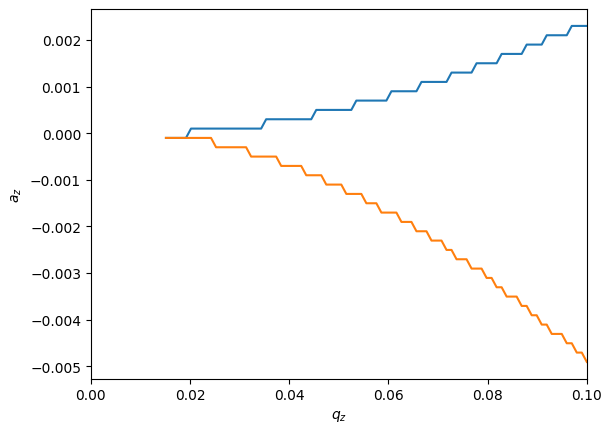

In [249]:
a_array = np.linspace(-0.1,0.1,1000)
q_array= np.linspace(0,0.1,100)

[topA,topQ,bottomA,bottomQ] = makeStabilityDiagram(a_array,q_array,0)
#[topA2,topQ2,bottomA2,bottomQ2] = makeStabilityDiagram(a_array,q_array,0.1)
print(print(len(topA)))

plt.scatter(topQ,topA)
plt.scatter(bottomQ,bottomA)
plt.xlabel(r'$q_z$')
plt.ylabel(r'$a_z$')
plt.xlim(0,0.1)